<a href="https://colab.research.google.com/github/RosAI-27/iris2.app/blob/main/Bank_additionnal_full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/content/bank-additional-full.csv', sep=';')

# Display first 5 rows
print(data.head())

# Check dataset info
print(data.info())

# Check class distribution (target variable: 'y')
print(data['y'].value_counts())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [2]:
# Convert target variable to binary (0/1)
data['y'] = data['y'].map({'no': 0, 'yes': 1})

# One-hot encode categorical features
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Split features and target
X = data.drop('y', axis=1)
y = data['y']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(scaler)
print(X_train_scaled)
print(X_test_scaled)

StandardScaler()
[[ 0.86373877 -0.12019627  0.52298128 ...  2.01433847  0.39944711
  -0.18627755]
 [-0.28972159 -0.2167318  -0.20368791 ...  2.01433847 -2.50346033
  -0.18627755]
 [ 3.65126795  3.43617293 -0.56702251 ... -0.4964409   0.39944711
  -0.18627755]
 ...
 [ 1.34434725 -0.49089273  0.52298128 ... -0.4964409   0.39944711
  -0.18627755]
 [-1.05869515 -0.3596044  -0.56702251 ... -0.4964409   0.39944711
  -0.18627755]
 [-0.48196498  1.10387435  0.15964669 ... -0.4964409   0.39944711
  -0.18627755]]
[[-0.77033007 -0.49089273  0.88631588 ... -0.4964409   0.39944711
  -0.18627755]
 [-0.28972159 -0.6105968  -0.56702251 ... -0.4964409   0.39944711
  -0.18627755]
 [ 3.17065947 -0.49089273 -0.20368791 ... -0.4964409   0.39944711
  -0.18627755]
 ...
 [-0.67420837  0.825852   -0.56702251 ... -0.4964409  -2.50346033
  -0.18627755]
 [ 0.38313029  1.58269061  1.61298507 ... -0.4964409   0.39944711
  -0.18627755]
 [ 0.19088689 -0.67624096  0.88631588 ... -0.4964409   0.39944711
  -0.18627755]]

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # For AUC

Accuracy: 0.9163631949502307
ROC AUC: 0.9424203382235011
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.44      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238



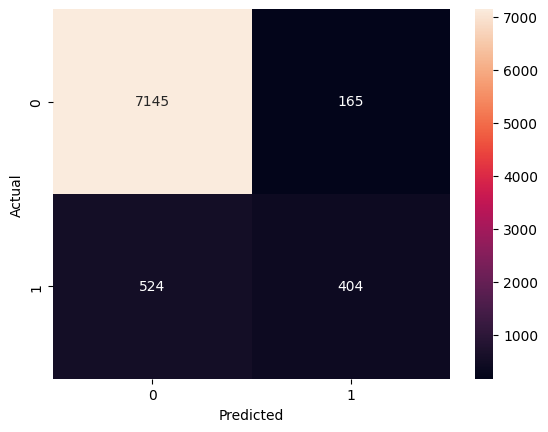

In [6]:
#evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [7]:
#Expected Output:

#-Accuracy ~88-90%, but ROC AUC is more important due to class imbalance.

#-Focus on recall for the minority class ("yes").

In [8]:
#improve the model
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Retrain the model
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=1000)

In [9]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Evaluate
y_pred_rf = rf.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      7310
           1       0.62      0.66      0.64       928

    accuracy                           0.92      8238
   macro avg       0.79      0.80      0.79      8238
weighted avg       0.92      0.92      0.92      8238



In [10]:
#Deploy the Model with Streamlit
import joblib

# Save the model and scaler
joblib.dump(rf, 'bank_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [12]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00


In [13]:

# app.py
import streamlit as st
import joblib
import pandas as pd

# Load model and scaler
model = joblib.load('bank_model.pkl')
scaler = joblib.load('scaler.pkl')

# Create input fields
st.title("Bank Marketing Prediction")
age = st.number_input("Age", min_value=18, max_value=100)
duration = st.number_input("Duration (last contact duration in seconds)", min_value=0)

# Add other features (simplified for demo)
# ... add more inputs based on your dataset features ...

# Predict
if st.button("Predict"):
    input_data = pd.DataFrame([[age, duration]], columns=['age', 'duration'])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)
    st.write("Will the client subscribe? ", "Yes" if prediction[0] == 1 else "No")

2025-02-02 08:29:36.932 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 08:29:37.161 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-02 08:29:37.164 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 08:29:37.168 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 08:29:37.175 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 08:29:37.179 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 08:29:37.182 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-02 08:29:37.188 Session state does not 